# Temperature NN

### Imports

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random
from generate_temp_nn_data import GenerateData

### Generate Training Data and Test Data

In [3]:
generate = GenerateData(1000,500,0.03,100)

--- 24.64016628265381 seconds ---


#### Example Images

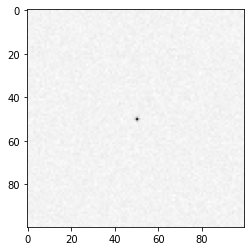

In [4]:
# T = 0.5
for i in range(len(generate.y_train)):
    if generate.y_train[i]==0:
        plt.imshow(generate.x_train[i],cmap=plt.cm.binary)
        break

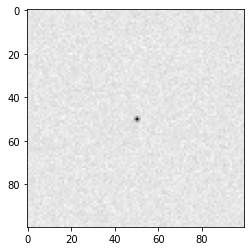

In [5]:
# T = 1
for i in range(len(generate.y_train)):
    if generate.y_train[i]==1:
        plt.imshow(generate.x_train[i],cmap=plt.cm.binary)
        break

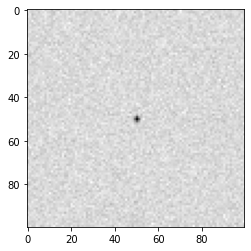

In [6]:
# T = 1.5
for i in range(len(generate.y_train)):
    if generate.y_train[i]==2:
        plt.imshow(generate.x_train[i],cmap=plt.cm.binary)
        break

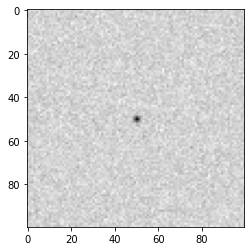

In [7]:
# T = 2
for i in range(len(generate.y_train)):
    if generate.y_train[i]==3:
        plt.imshow(generate.x_train[i],cmap=plt.cm.binary)
        break

### Compile Basic Feed Forward NN

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(4,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Metal device set to: Apple M2


2022-07-28 10:24:30.124333: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-28 10:24:30.124621: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Train

In [5]:
model.fit(generate.x_train,generate.y_train,epochs=10)

Epoch 1/10


2022-07-28 10:24:45.199524: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-28 10:24:45.350154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 0.9644 - accuracy: 0.5380
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0484 - accuracy: 0.9930
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 9.5335e-04 - accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 3.5691e-04 - accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 2.5666e-04 - accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 2.0311e-04 - accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 1.6904e-04 - accuracy: 1.0000
Epoch 8/10
32/32 [==============================] - 0s 6ms/step - loss: 1.4245e-04 - accuracy: 1.0000
Epoch 9/10
32/32 [==============================] - 0s 6ms/step - loss: 1.2270e-04 - accuracy: 1.0000
Epoch 10/10
32/32 [==============================] - 0s 6ms/step - loss: 1.0698e-04 - accuracy: 1.000

### Evaluate Loss and Accuracy on Test Set

In [6]:
val_loss, val_acc = model.evaluate(generate.x_test,generate.y_test)
print("loss: ",val_loss,"\n","accuracy: ",val_acc)

16/16 [==============================] - 0s 5ms/step - loss: 0.9458 - accuracy: 0.6340
loss:  0.945786714553833 
 accuracy:  0.6340000033378601


2022-07-28 10:24:57.796521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [11]:
model.save('num_model')
new_model = tf.keras.models.load_model('num_model')
predictions = new_model.predict(generate.x_test)

INFO:tensorflow:Assets written to: num_model/assets
16/16 [==============================] - 0s 3ms/step


2022-07-27 10:23:46.524648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1


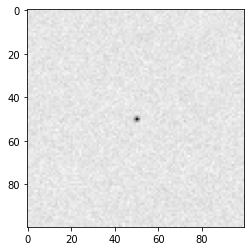

In [12]:
predict_data_point = 10
print(np.argmax(predictions[predict_data_point]))
plt.imshow(generate.x_test[predict_data_point],cmap=plt.cm.binary)

In [4]:
df = pd.read_csv("temp_nn_data.csv")